In [91]:
# import toolboxes
import numpy as np
import pandas as pd

In [92]:
# get the data
df = pd.read_csv('indego-trips-2018-q1.csv')
df.dtypes

trip_id                  int64
duration                 int64
start_time              object
end_time                object
start_station            int64
start_lat              float64
start_lon              float64
end_station              int64
end_lat                float64
end_lon                float64
bike_id                  int64
plan_duration            int64
trip_route_category     object
passholder_type         object
dtype: object

In [93]:
# group most frequent stations
df.groupby(['start_station'])['start_time'].nunique().sort_values(ascending = False) 

start_station
3010     2923
3021     2542
3023     2254
3020     2139
3045     2116
3054     2012
3032     1907
3012     1860
3108     1667
3101     1619
3022     1557
3052     1507
3066     1461
3040     1458
3063     1452
3038     1451
3102     1422
3009     1393
3064     1370
3028     1360
3007     1342
3018     1287
3058     1277
3029     1235
3053     1233
3061     1165
3030     1142
3156     1122
3078     1097
3033     1052
         ... 
3077      311
3036      299
3110      297
3119      281
3150      265
3088      252
3065      238
3157      220
3124      211
3104      191
3017      188
3153      187
3123      180
3107      165
3097      165
3067      159
3095      142
3016      141
3152      131
3103      127
3122       93
3113       84
3093       79
3117       72
3111       70
3106       67
3096       65
3014        7
90007       7
90018       1
Name: start_time, Length: 125, dtype: int64

In [94]:
# group most frequent stations
station3010 = df[(df['start_station'] == 3010)].reset_index()
import calendar
import datetime

In [95]:
station3010['month'] = pd.DatetimeIndex(station3010['start_time']).month
station3010['day'] = pd.DatetimeIndex(station3010['start_time']).day

In [96]:
#feb_3010 = station3010[station3010['month']==2].reset_index()
#feb_3010.to_csv('feb.csv')

In [102]:
station3045 = df[(df['start_station'] == 3045)].reset_index()
station3045['month'] = pd.DatetimeIndex(station3045['start_time']).month
station3045['weekday'] = pd.DatetimeIndex(station3045['start_time']).dayofweek
# group by day


In [110]:
newstation = station3045[(station3045['month']== 2)].reset_index()
#station3045['weekday'] 
dayofweek = (newstation.groupby(['weekday'])['trip_id'].nunique())
dayofweek

weekday
0    131
1    140
2    141
3    138
4     90
5     44
6     39
Name: trip_id, dtype: int64

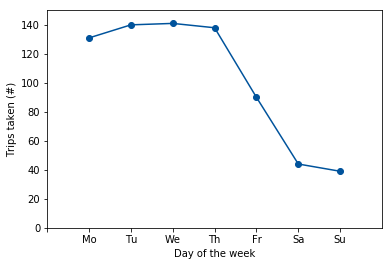

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline
f = plt.figure()
days = [1,2,3,4,5,6,7]
plt.plot(days, dayofweek, 'o-', color = '#00539C')

plt.xlabel('Day of the week')
plt.ylabel('Trips taken (#)')
plt.xlim([0, 8])
plt.ylim([0, 150])
plt.xticks(np.arange(8), ('', 'Mo', 'Tu', 'We', 'Th', 'Fr', 'Sa', 'Su', ''))
plt.show()

f.savefig("dayOfWeek.pdf", bbox_inches = 'tight')